In [16]:
import datetime

import nengo
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
mus = scipy.io.loadmat("results/mus.mat")["mus"]
print(mus.shape)
mat_bl = scipy.io.loadmat("results/blend_out.mat")['p_CTestPLMorph']
print(mat_bl.shape)
mat_long = scipy.io.loadmat("results/blend_out_1k.mat")['p_CTestPLMorph']
print(mat_long.shape)
mat_ok = scipy.io.loadmat("results/slow_blend_1k.mat")['p_CTestPLMorph']
print(mat_ok.shape)

(1, 1302)
(1, 1302)
(1, 2002)
(1, 2002)


In [18]:
inhib_bl = np.load("results/inhib_blend_res.npy")
print(inhib_bl.shape)
scalar_bl = np.load("results/scalar_blend_res.npy")
print(scalar_bl.shape)

(2500, 1)
(2500, 1)


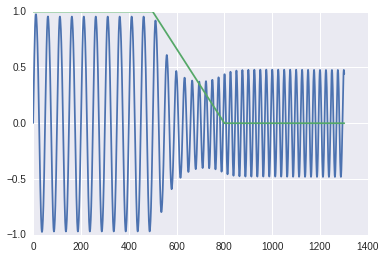

In [6]:
plt.plot(mat_bl.T)
plt.plot(mus.T)

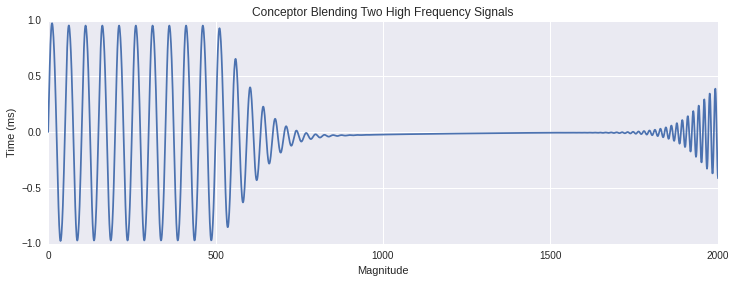

In [42]:
fig = plt.figure(figsize=(12,4))
plt.plot(mat_long.T)
plt.xlim(0, 2000)
plt.ylabel("Time (ms)")
plt.xlabel("Magnitude")
plt.title("Conceptor Blending Two High Frequency Signals")
plt.savefig("highblend.pdf", format="pdf")

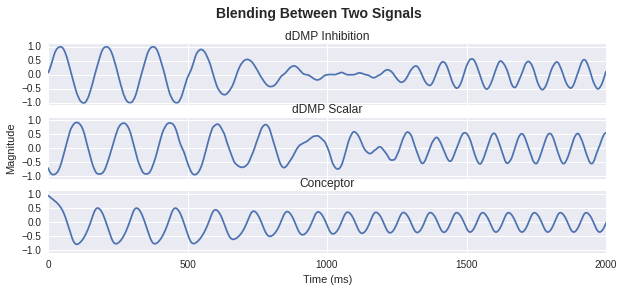

In [43]:
fig, axes = plt.subplots(3, sharex=True, sharey=True, figsize=(10,4))
dat_list = (inhib_bl[:-500], scalar_bl[:-500][::-1], mat_ok.T)
title_list = ("dDMP Inhibition", "dDMP Scalar", "Conceptor")

for di, dat in enumerate(dat_list):
    axes[di].plot(dat)
    axes[di].set_title(title_list[di])
    axes[di].set_xlim((0, 2000))
    axes[di].set_ylim((-1.1, 1.1))
    
fig.subplots_adjust(top=0.85)
fig.suptitle("Blending Between Two Signals", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Magnitude")
axes[2].set_xlabel("Time (ms)")
plt.savefig("compblend.pdf", format="pdf")

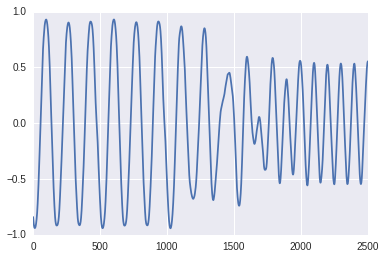